In [70]:
from AllGraphs import *
from Draw import *
from random import *
from math import *
graphConstructor = IncidencyGraph

In [71]:
class Automaton (BaseGraph) :

    def __init__(self) :
        self.states = dict() # chaque état envoie vers un dictionnaire dont les clés sont les transitions et les valeurs les états d'arrivée.
        self.init_state = None # état initial : d'où commence l'automate
        self.final_states = set() # états finaux : états pour lesquels une arrivée est considérée comme acceptant la situation

    def constructor(self) :
        return Automaton()

    def set_init_state(self, v) :
        self.init_state = v

    def add_final_state(self, v) :
        self.final_states.add(v)

    def add_final_states(self, it) :
        for e in it :
            self.add_final_state(e)

    def add_vertex(self, v) :
        # TODO : ajouter un état
        pass

    def add_edge(self, u, v, transition = "") :
        # TODO : ajouter une transition de u vers v par une lettre transition
        return False

    def get_transition(self, u, v) :
        # TODO : renvoyer une chaîne de caractères représentant les transitions de u vers v
        return ""

    def get_edges(self) :
        # TODO : renvoyer les transitions d'un état à un autre
        return set()

    def get_vertices(self) :
        # TODO : renvoyer l'ensemble des états
        return set()

    def has_vertex(self, v) :
        # TODO : indiquer si un état est présent dans l'automate
        return False

    def has_edge(self, u, v) :
        # TODO : indiquer si une transition existe de u vers v
        return False

    def remove_edge(self, u, v) :
        # TODO : supprimer les transitions de u vers v
        return False

    def remove_vertex(self, v):
        # TODO : supprimer l'état v
        return False

    def neigbors(self, v) :
        # TODO : renvoyer les états vers lesquels v peut prendre une transition
        return set()

    def transpose(self) :
        # TODO : transposer l'automate (inverse le sens des transitions)
        return Automaton()

    def aknowledge(self, word) :
        # TODO : vérifier si l'automate accepte un mot donné (il existe un chemin de l'état initial vers l'un des états finaux)
        return False

    def completer(self, alpha) :
        # TODO : ajouter un état pour qu'il existe une transition depuis chaque lettre de l'alphabet
        pass

    def determinist(self) :
        # TODO : indiquer si l'automate est déterministe (il ne peut prendre qu'une unique transition au maximum pour changer d'état)
        return False

    def determiniser(self, alpha) :
        # TODO : déterminiser l'automate (construire la table des transitions de chaque ensemble d'états et reconstruire le nouvel automate).
        return Automaton()

In [72]:
def example_automate() :
	graph = Automaton()
	graph.add_vertices({1, 2, 3})
	graph.set_init_state(1)
	graph.add_final_states({3})
	edges = {(1, 2) : "b", (2, 1) : "a", (1, 1) : "a", (1, 3) : "a", (3, 3) : "b"}
	graph.add_edges(edges)
	return graph

a True
b False
ab True
ba False
aaabaaaaabbbb True
bbb False
bbbabbb False
abbb True
Est déterministe ? False


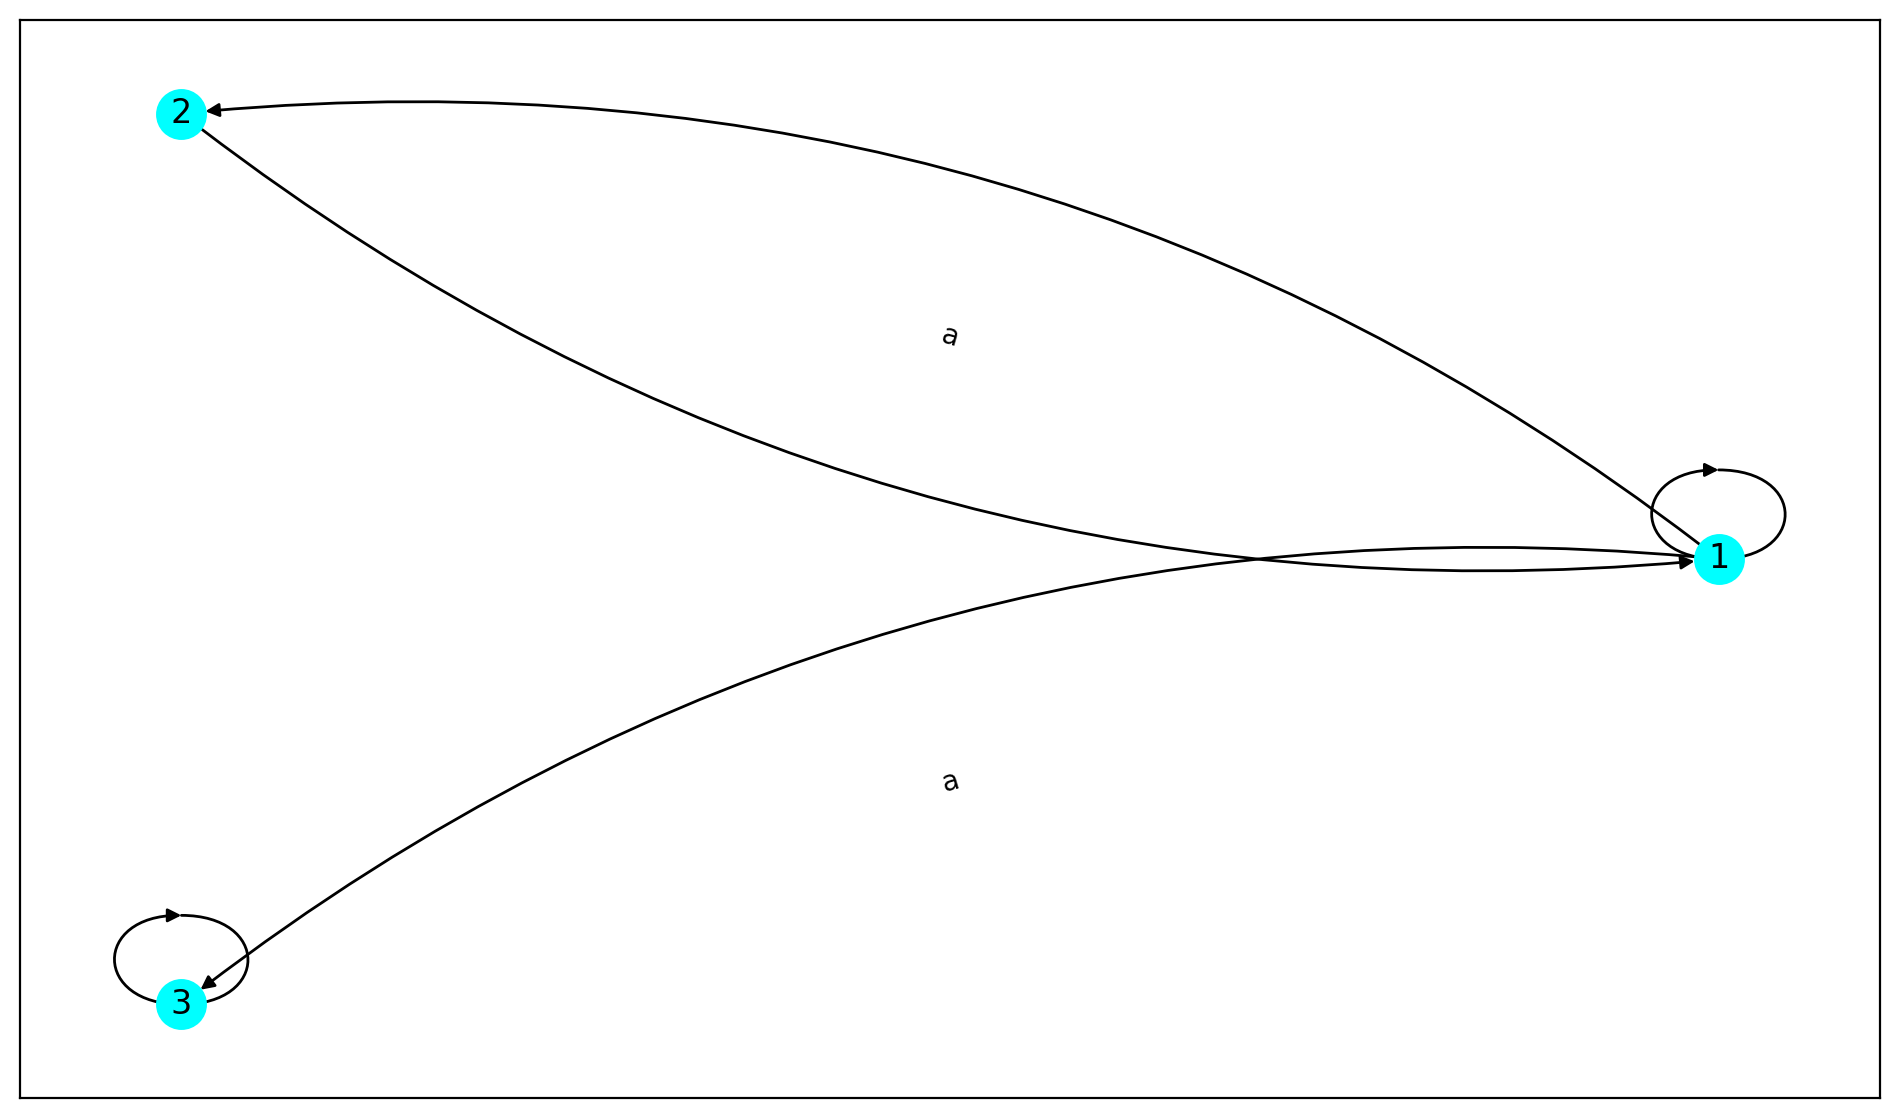

In [73]:
graph = example_automate()
words = ["a", "b", "ab", "ba", "aaabaaaaabbbb", "bbb", "bbbabbb", "abbb"]
for w in words :
    print(w, graph.aknowledge(w))
print("Est déterministe ?", graph.determinist())
draw_graph(graph)

a True
b False
ab True
ba False
aaabaaaaabbbb True
bbb False
bbbabbb False
abbb True
Est déterministe ? True


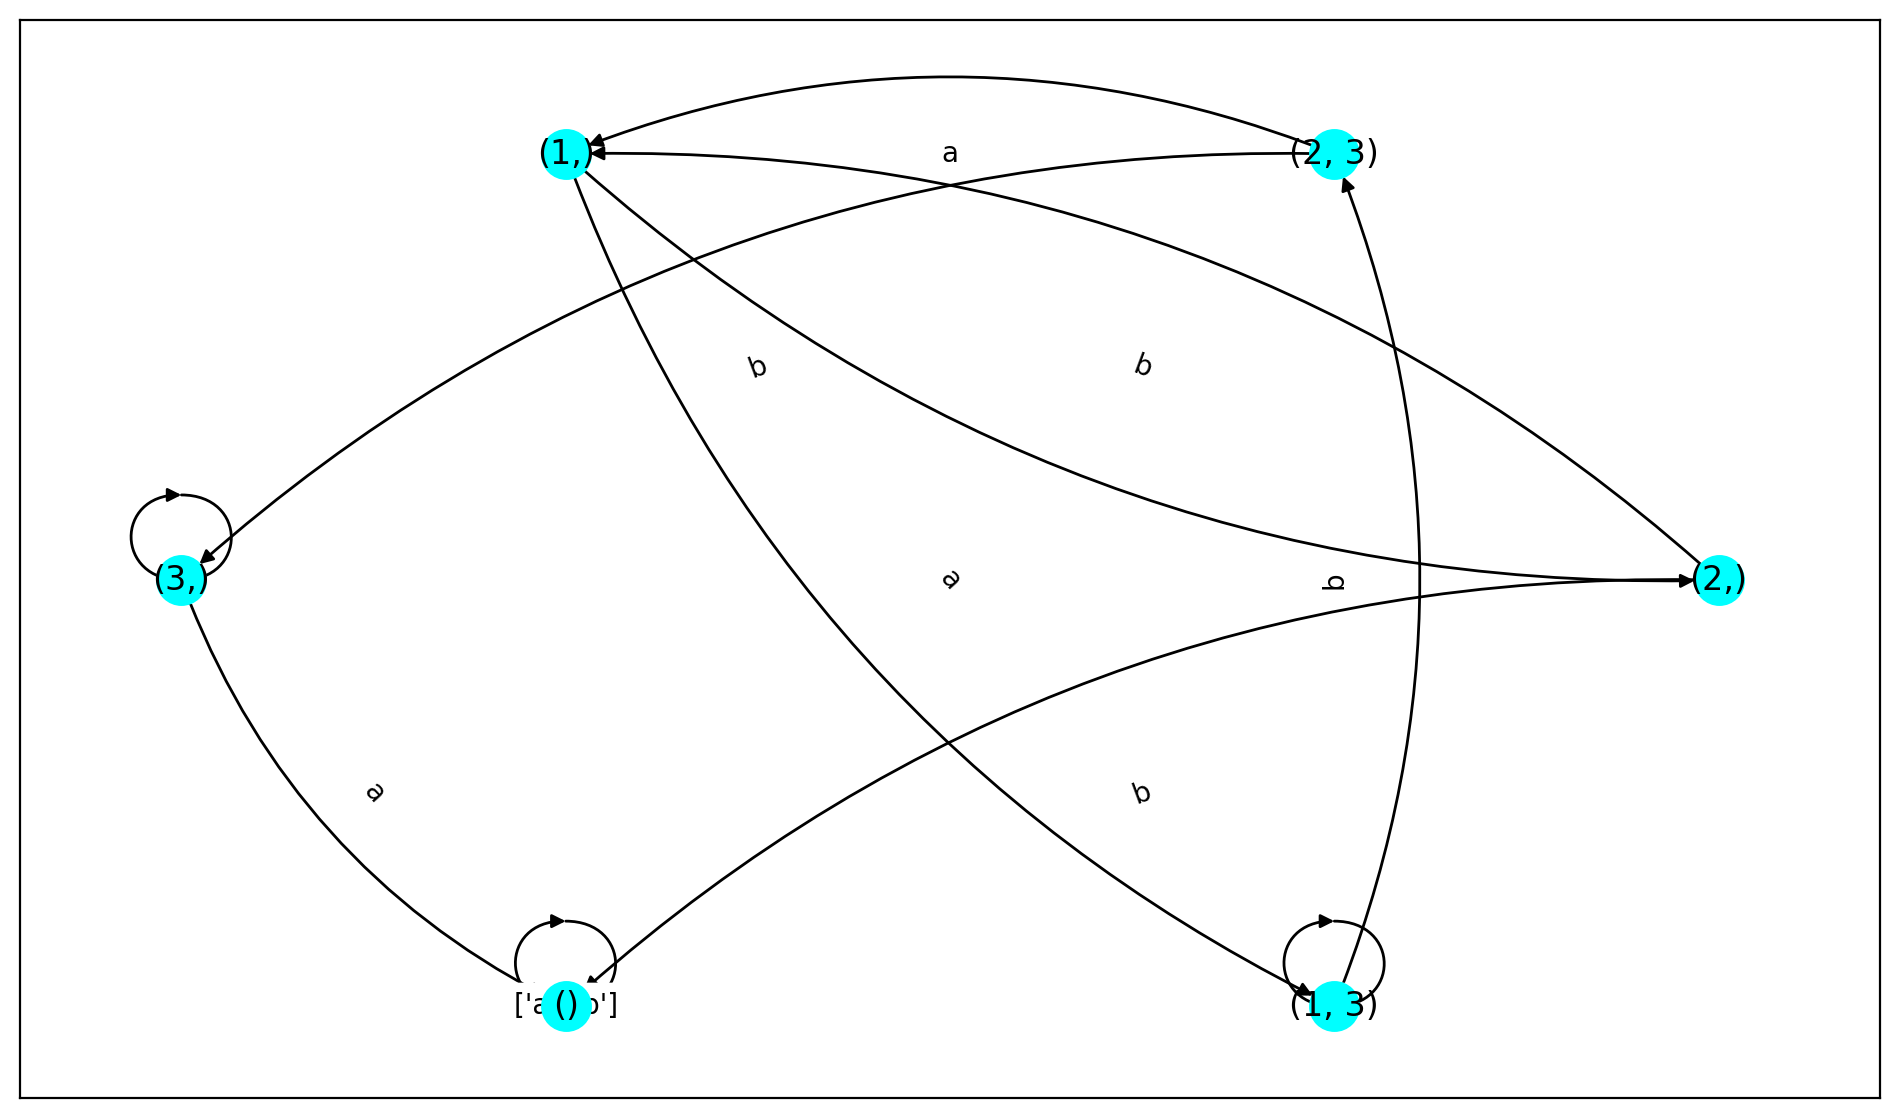

In [74]:
graph = example_automate()
graph = graph.determiniser("ab")
words = ["a", "b", "ab", "ba", "aaabaaaaabbbb", "bbb", "bbbabbb", "abbb"]
for w in words :
    print(w, graph.aknowledge(w))
print("Est déterministe ?", graph.determinist())
draw_graph(graph)

In [75]:
uniform = lambda x : [e / sum(x) for e in x]

def softmax_base(x, temperature) :
    # TODO : implémenter la distribution softmax (pour tout x_i, exp(x_i / température) / somme des exp(x_j / température) pour tout j)
    return uniform(x)

softmax = lambda temperature : lambda x : softmax_base(x, temperature)

In [76]:
def add_markov(text, graph, vision = 1) :
    # TODO : ajouter un texte dans le graph du nombre d'occurences de chaque transition d'une lettre ou groupe de lettre à sa suivante
    # TODO : paramétrer le graphe pour que chaque état se souvienne des vision - 1 précédentes lettres
    return graph

def normalize_markov(graph, proba_distribution = uniform) :
    # TODO : transformer le graphe en une chaîne de Markov en utilisant le nombre d'occurences de chaque transition et une loi de distribution des probabilités
	return graph

def build_markov(text, graph, vision = 1, proba_distribution = uniform) :
	add_markov(text, graph, vision)
	normalize_markov(graph, proba_distribution)

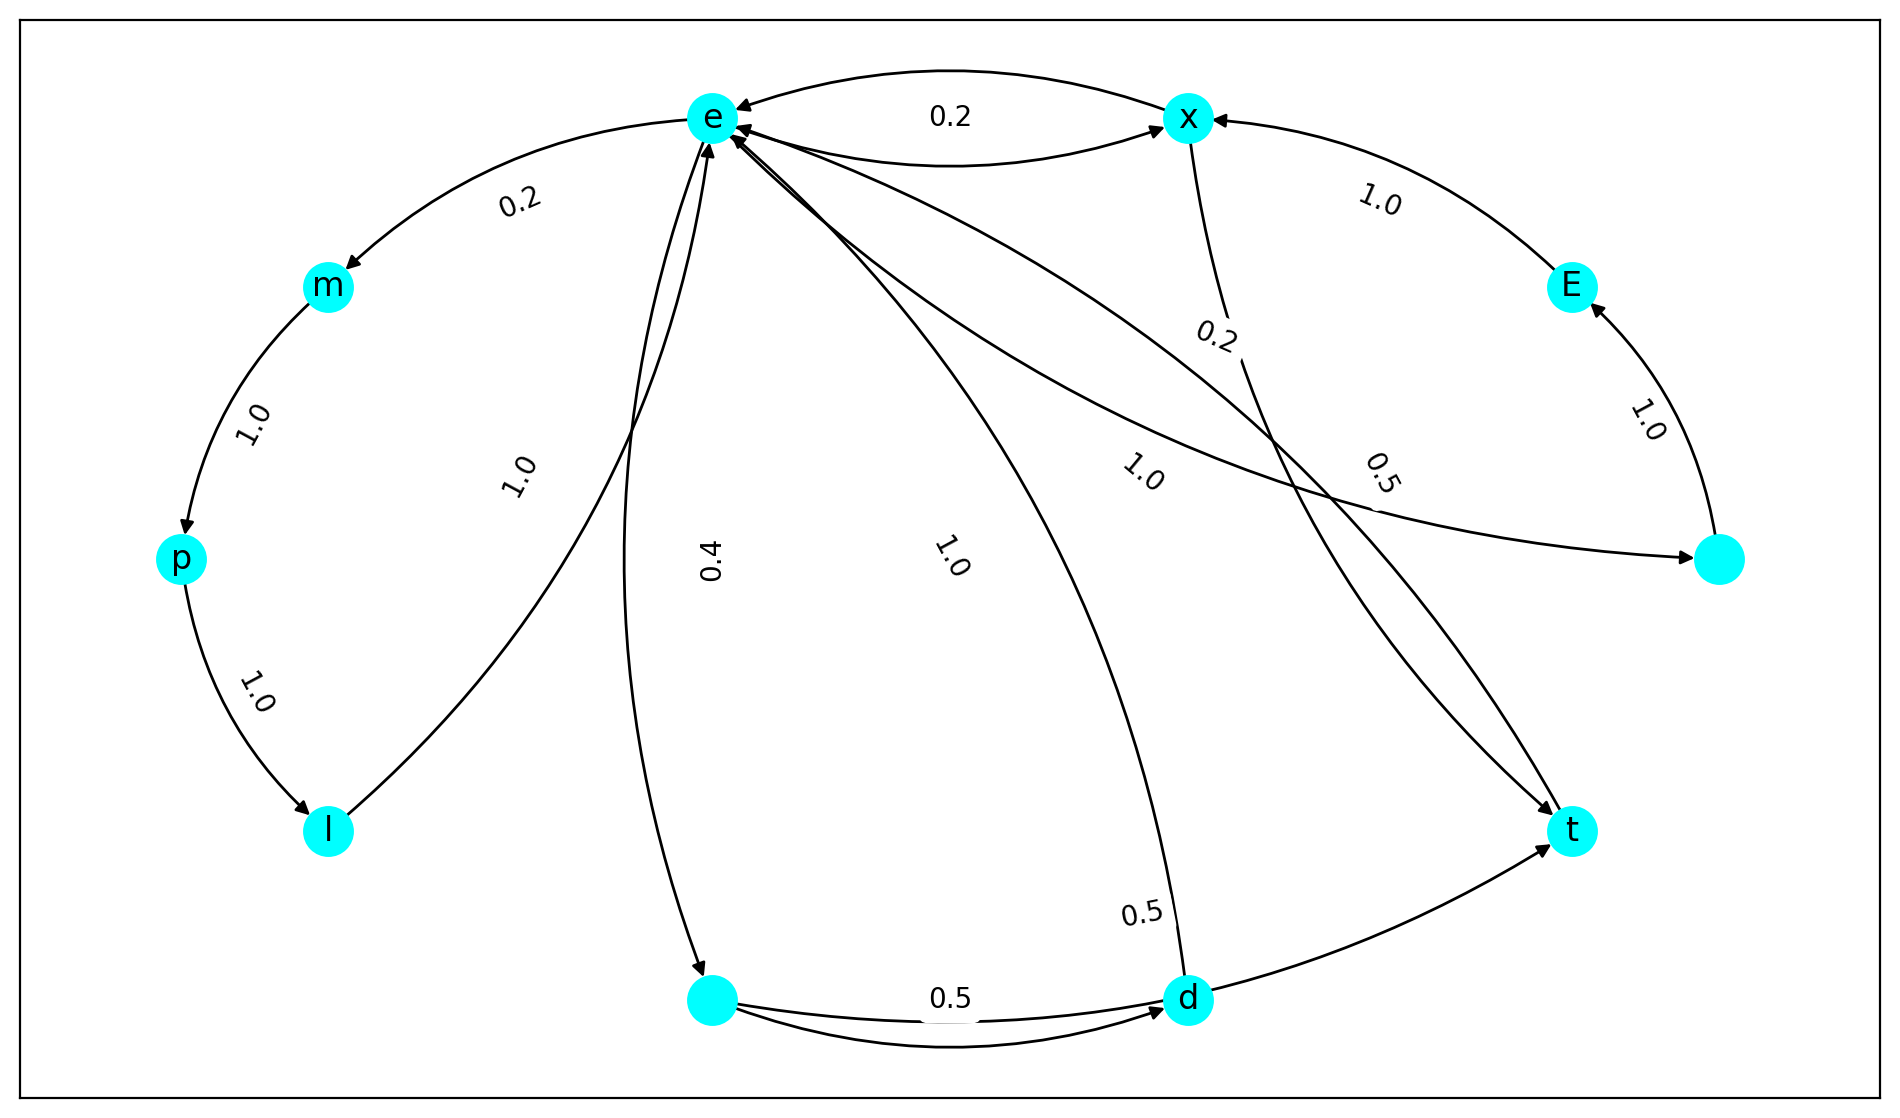

In [77]:
graph = graphConstructor()
build_markov("Exemple de texte", graph)
draw_graph(graph)

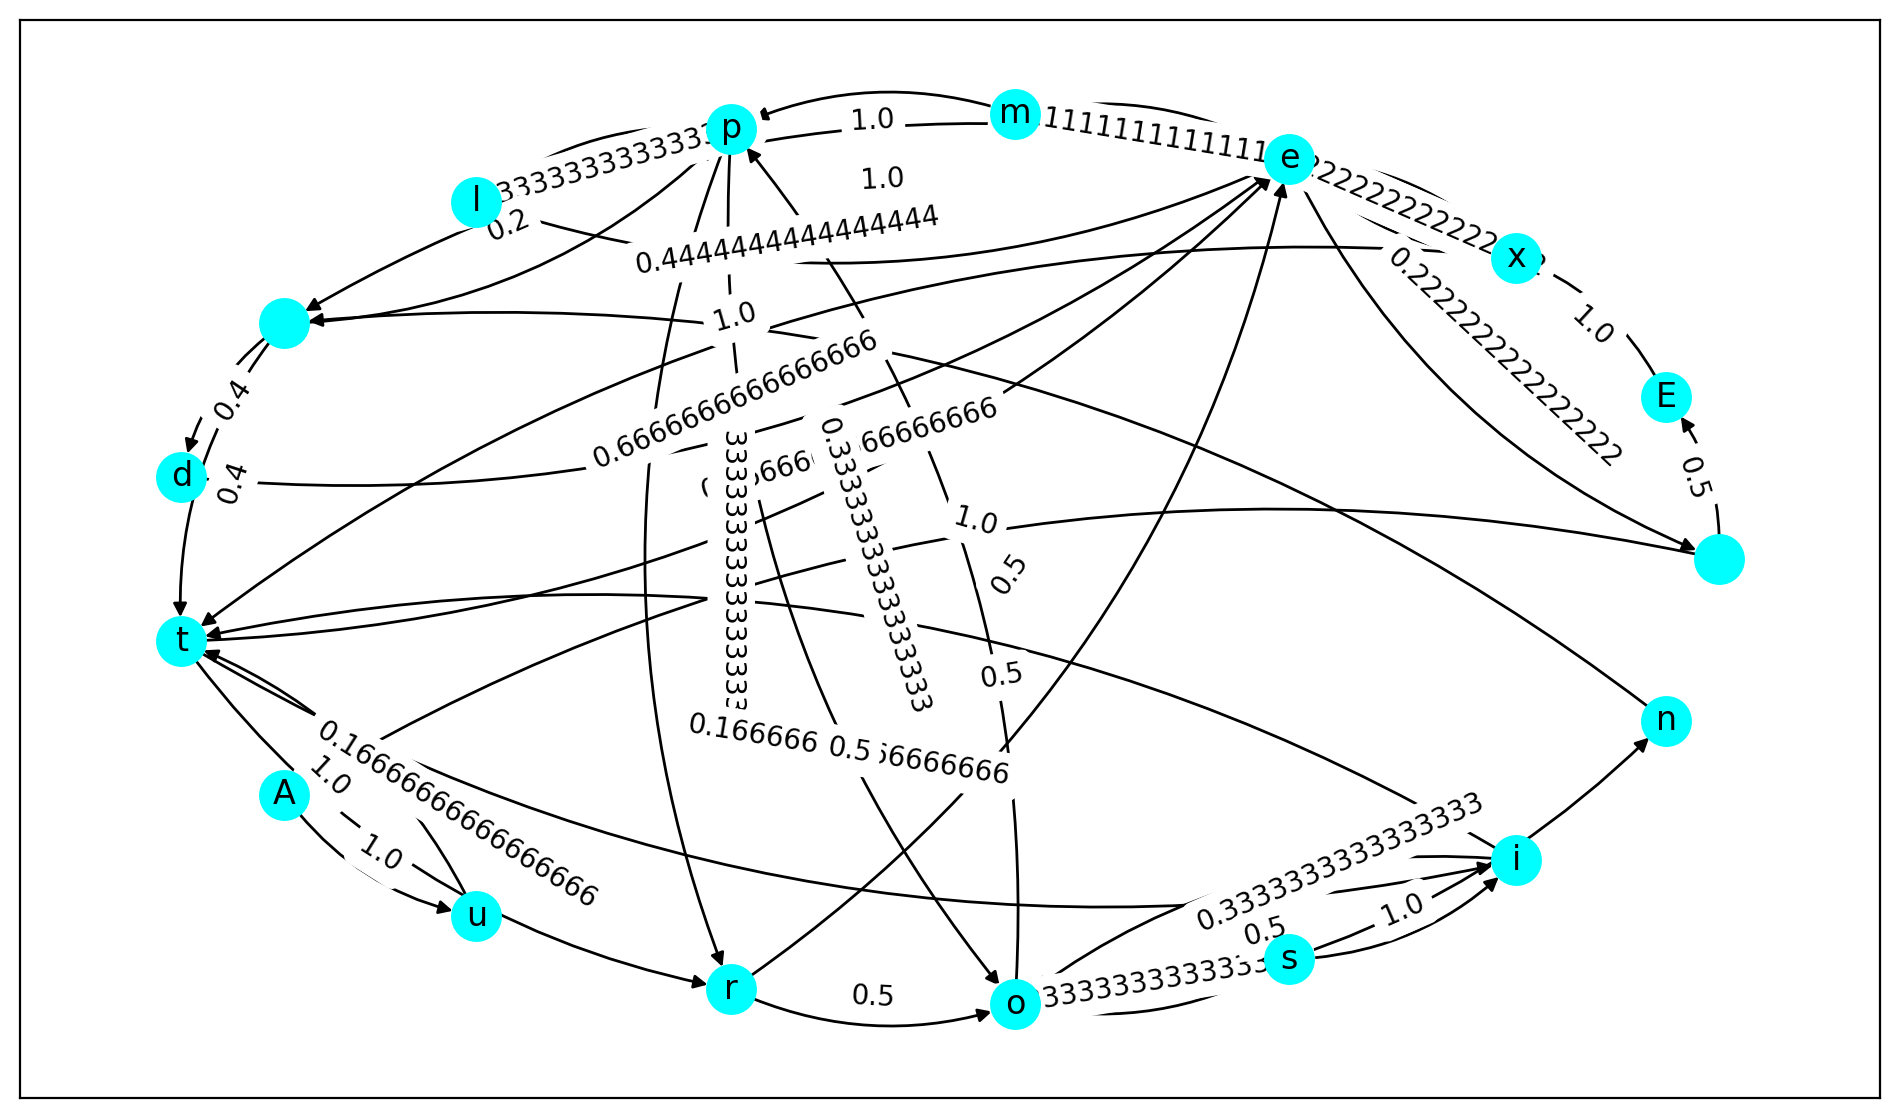

In [78]:
graph = graphConstructor()
add_markov("Exemple de texte", graph)
add_markov("Autre proposition de texte", graph)
normalize_markov(graph)
draw_graph(graph)

In [79]:
def generate(graph, vision = 1, repeats = 1) :
    # TODO : générer un texte via une marche aléatoire dans une chaîne de Markov
    res = ""
    return res

In [80]:
graph = graphConstructor()
build_markov("Exemple de texte.", graph)
print(generate(graph, repeats = 10))

Exte de de.Exe de templextemple de de.Exte texte de texemplemplexte.Exemple de temple.Exe te texe te te te.Exte.Exe de.Exte te dexte te temple de de dexte.Exte de te te.Exte.


In [81]:
graph = graphConstructor()
build_markov("Exemple de texte.", graph, vision = 2)
print(generate(graph, vision = 2, repeats = 10))

Exemple de texte.Exemple de de texte.Exemple te.Exemple te.Exemple de de de textextextexte.Exemple de te.Exemple te.Exemple de de textextextexte.Exemple textextextextextexte.Exemple de te.


In [82]:
filenames = []
# TODO : vous devez copier les fichiers .c et trancho_codes_liste.txt dans un dossier "ressources" à côté de ce script
with open("ressources/trancho_codes_liste.txt", "r") as f :
    filenames += ["ressources/%s" % e for e in f.read().split("\n") if len(e) > 0]
vision = 20
repeats = 1
temperature = 0
graph = graphConstructor()
for filename in filenames :
    with open(filename, "r") as f :
        graph = add_markov(f.read(), graph, vision = vision)
        print("Loaded \"%s\"" % filename)
graph = normalize_markov(graph, proba_distribution = softmax(temperature) if temperature != 0 else uniform)
print("Graph with %d vertices and %d edges" % (len(graph.get_vertices()), len(graph.get_edges())))

Loaded "ressources/002_01_hello_esgi.c"
Loaded "ressources/003_01_student_hello.c"
Loaded "ressources/004_02_concept_variables.c"
Loaded "ressources/005_02_afficher_variables.c"
Loaded "ressources/006_02_lecture_variable.c"
Loaded "ressources/007_02_int_hexa.c"
Loaded "ressources/008_02_affectations.c"
Loaded "ressources/009_02_traduction.c"
Loaded "ressources/010_02_int_overflow.c"
Loaded "ressources/011_02_float_imprecision.c"
Loaded "ressources/012_02_int_part.c"
Loaded "ressources/013_02_hexadecimal.c"
Loaded "ressources/015_02_shapes.c"
Loaded "ressources/016_03_calculer.c"
Loaded "ressources/017_03_operations.c"
Loaded "ressources/018_03_division_par_zero.c"
Loaded "ressources/019_03_addition.c"
Loaded "ressources/020_03_imprecision.c"
Loaded "ressources/021_03_message_code.c"
Loaded "ressources/022_03_angle.c"
Loaded "ressources/023_03_ip.c"
Loaded "ressources/024_03_binet.c"
Loaded "ressources/025_03_shooter.c"
Loaded "ressources/026_04_categorie_age.c"
Loaded "ressources/027_0

Loaded "ressources/054_06_dichotomie.c"


Loaded "ressources/055_06_binomiaux.c"
Loaded "ressources/056_06_sinus_taylor.c"
Loaded "ressources/057_06_biased_random.c"


Loaded "ressources/058_06_recurves.c"
Loaded "ressources/059_07_concept_tableau.c"
Loaded "ressources/060_07_lire_valeurs.c"
Loaded "ressources/061_07_statistiques.c"
Loaded "ressources/062_07_string.c"
Loaded "ressources/063_07_vigenere.c"
Loaded "ressources/064_07_count.c"
Loaded "ressources/065_07_liste_entiers.c"
Loaded "ressources/066_07_dichotomie.c"
Loaded "ressources/067_07_fibonacci.c"
Loaded "ressources/068_07_permutation.c"
Loaded "ressources/069_08_echanger.c"
Loaded "ressources/070_08_pointeur_sur_variable.c"
Loaded "ressources/071_08_pointinception.c"
Loaded "ressources/073_08_echanger_tableau.c"
Loaded "ressources/074_08_tableau_de_variables.c"
Loaded "ressources/075_08_adresse_sur_entier.c"
Loaded "ressources/076_08_dupliquer_chaine.c"
Loaded "ressources/077_08_visualisation_interpretation.c"
Loaded "ressources/078_08_concept_pointeur.c"
Loaded "ressources/079_08_concatenation_chaines.c"
Loaded "ressources/080_08_liste_de_noms.c"
Loaded "ressources/081_08_tableau_dynami

Loaded "ressources/096_09_morpion.c"


Loaded "ressources/098_09_fibo_generalise.c"
Loaded "ressources/099_10_creation.c"
Loaded "ressources/100_10_lire_fichiers.c"
Loaded "ressources/101_10_fichiers_binaires.c"
Loaded "ressources/102_10_edition_fichier.c"
Loaded "ressources/103_10_compter_lancements.c"
Loaded "ressources/104_10_vigenere_fichier.c"
Loaded "ressources/105_10_sauvegarde_binaire.c"
Loaded "ressources/106_10_enregistrement_numeros.c"
Loaded "ressources/107_11_creation_structure.c"
Loaded "ressources/108_11_passage_par_copie.c"
Loaded "ressources/109_11_passage_par_adresse.c"


Loaded "ressources/110_11_manipulation_dynamique.c"
Loaded "ressources/111_11_definir_vecteur2d.c"
Loaded "ressources/112_11_gerer_grille.c"
Loaded "ressources/113_11_fight.c"
Loaded "ressources/114_11_ajout_liste_chaine.c"
Loaded "ressources/115_11_voyageur.c"
Loaded "ressources/117_12_table_de_hachage.c"
Loaded "ressources/118_12_lexique.c"
Loaded "ressources/119_14_trier_points.c"
Loaded "ressources/120_14_benchmark_qsort.c"
Loaded "ressources/121_14_trier_pointeurs_de_fonctions.c"
Loaded "ressources/122_14_changer_de_langue.c"
Loaded "ressources/125_14_n_alloc.c"
Loaded "ressources/128_13_operations_bit_a_bit.c"
Loaded "ressources/129_13_grille_sur_entier.c"
Loaded "ressources/130_13_buffer_bit_a_bit.c"


Graph with 173111 vertices and 176617 edges


In [69]:
import subprocess
print("Running generation.")
subprocess.getoutput("mkdir results")
for i in range(repeats) :
    result = generate(graph, vision = vision, repeats = 1)
    print(result)
    with open("results/main%03d.c" % i, "w") as f :
        f.write(result)

Running generation.
/**
 * ESGI : Cours de Langage C de Kevin TRANCHO.
 * Correction de l'exercice 110.
 */

#include <stdio.h>
#include <stdlib.h>
#include <string.h>
#include <math.h>

int main() {
  int n;
  unsigned long value;
  unsigned long res[2],
  unsigned long second[2]) {
  
  unsigned long x = second[0][0], z = second[0][1];
  unsigned long y = second[1][0], w = second[1][1];
  
  res[0][0] = a * x + b * y; res[0][1] = a * z + b * w;
  res[1][0] = c * x + d * y; res[1][1] = c * z + d * w;
}

void matrix2x2_display(unsigned long matrix[2][2],
  int n) {
  
  unsigned long x = second[0], y = second[1];
  
  res[0] = first[0][0] * x + first[0][1] * y;
  res[1] = first[1][0] * x + first[1][1] * y;
}

/* Copie d'une matrice pour affectation : */
  return target;
}

Vecteur2d Vecteur2d_translation(p, Vecteur2d_create(1, 0));
  Vecteur2d_print(p);
  p = Vecteur2d_rotation(p, Vecteur2d_create(0, 0);
  printf("Vecteur2d : ");
  Vecteur2d_print(Vecteur2d_create(0, 0);
  printf("Vect